In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [47]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

In [48]:
iris = datasets.load_iris()
clf = svm.SVC()
clf.fit(X,y)

SVC()

In [49]:
X = iris.data[:,:2]
y = iris.target

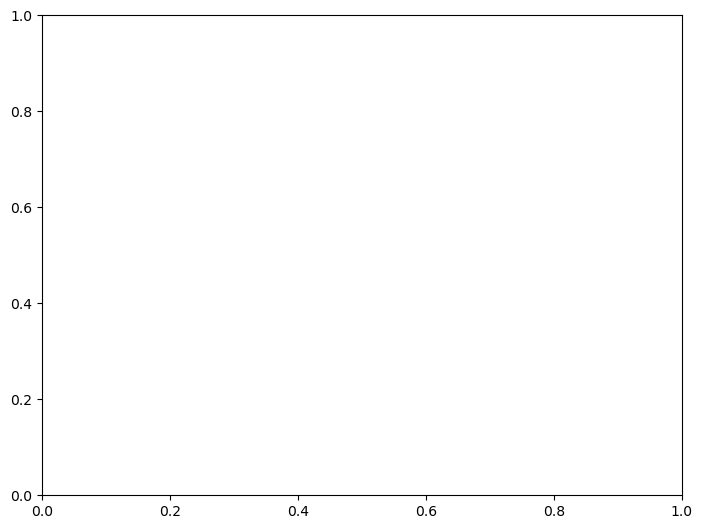

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


[]

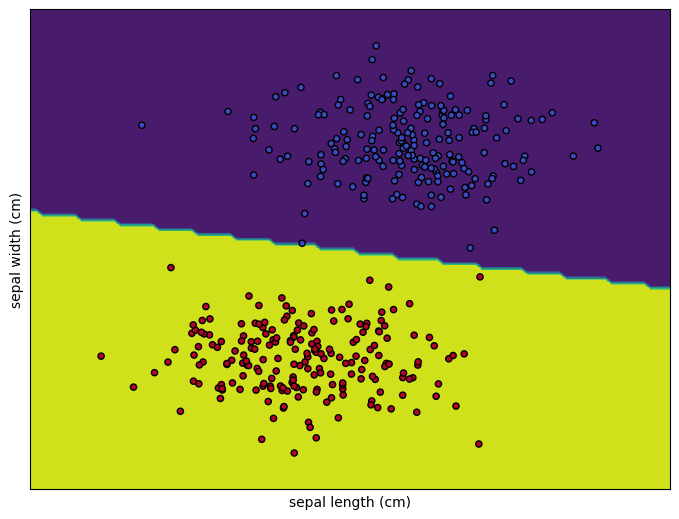

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

X0, X1 = X[:, 0], X[:, 1]

clf = svm.SVC()
clf.fit(X,y)

disp = DecisionBoundaryDisplay.from_estimator(clf,X,response_method="predict",ax=ax,
                                         xlabel=iris.feature_names[0],ylabel=iris.feature_names[1])


ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())


In [101]:
X, y = datasets.make_blobs(n_samples=2, centers=2,random_state=6)

In [102]:
clf = svm.SVC(kernel="linear", C=1)
clf.fit(X,y)

SVC(C=1, kernel='linear')

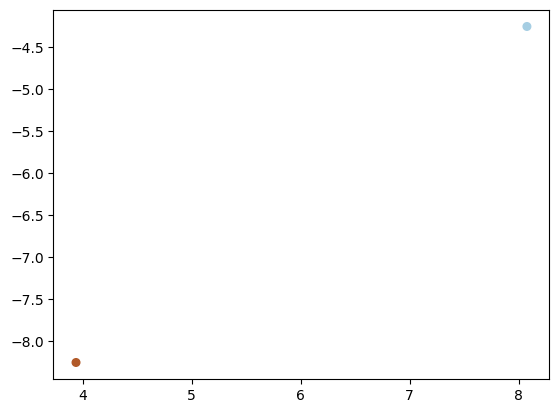

In [103]:
plt.scatter(X[:,0],X[:,1],c=y,s=30, cmap=plt.cm.Paired)

Text(0.5, 1.0, 'SVM: Maximum margin separating hyperplane')

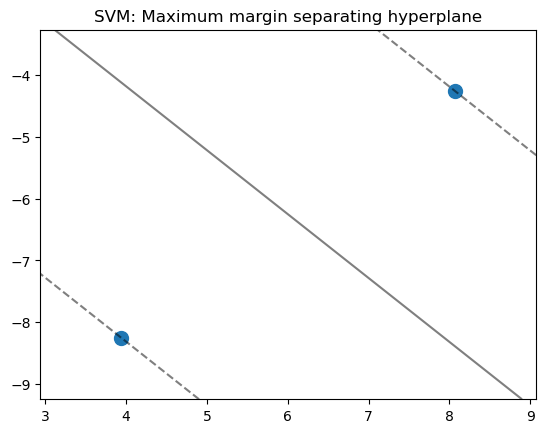

In [104]:


ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    s=100,
    linewidth=1
)
ax.set_title("SVM: Maximum margin separating hyperplane")


In [164]:
X = iris.data[:,:2]
y = iris.target

In [165]:
C = 1.0

In [166]:
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", C=C),
    svm.SVC(kernel="poly", C=C),
)


models = (clf.fit(X,y) for clf in models)

In [167]:
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

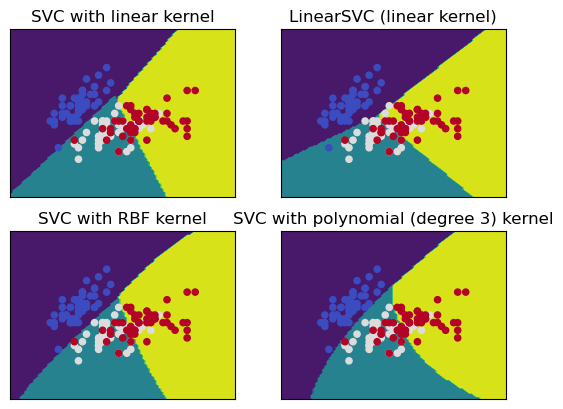

In [168]:
fig, sub = plt.subplots(2,2)
X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm, s=20)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


In [190]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X, y = datasets.make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)


In [222]:
clf = svm.SVC(kernel="linear", C=1)
clf.fit(X,y)

wclf = svm.SVC(kernel="linear", class_weight={1:20})
wclf.fit(X,y)

SVC(class_weight={1: 20}, kernel='linear')

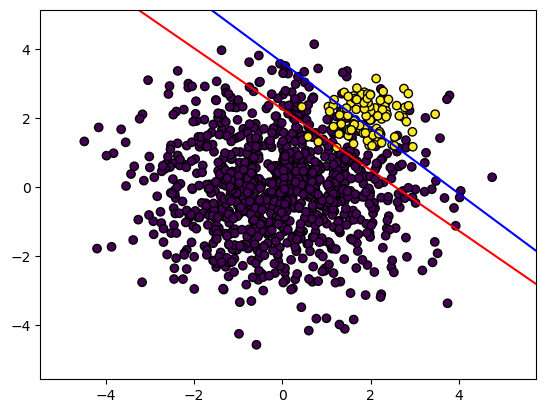

In [223]:
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    colors="b",
    plot_method='contour',
    levels=[0],
    ax=ax,
)

wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method='contour',
    colors="r",
    levels=[0],
    ax=ax
)



In [261]:
X = np.sort(5 * np.random.rand(40,1), axis=0)
y = np.sin(X).ravel()

In [262]:
y[::5] += 3 * (0.5 - np.random.rand(8))

In [263]:
svr_rbf = svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = svm.SVR(kernel="linear", C=100, gamma="auto")
svr_poly = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [264]:
lw = 2
svrs = [svr_rbf,svr_lin,svr_poly]
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

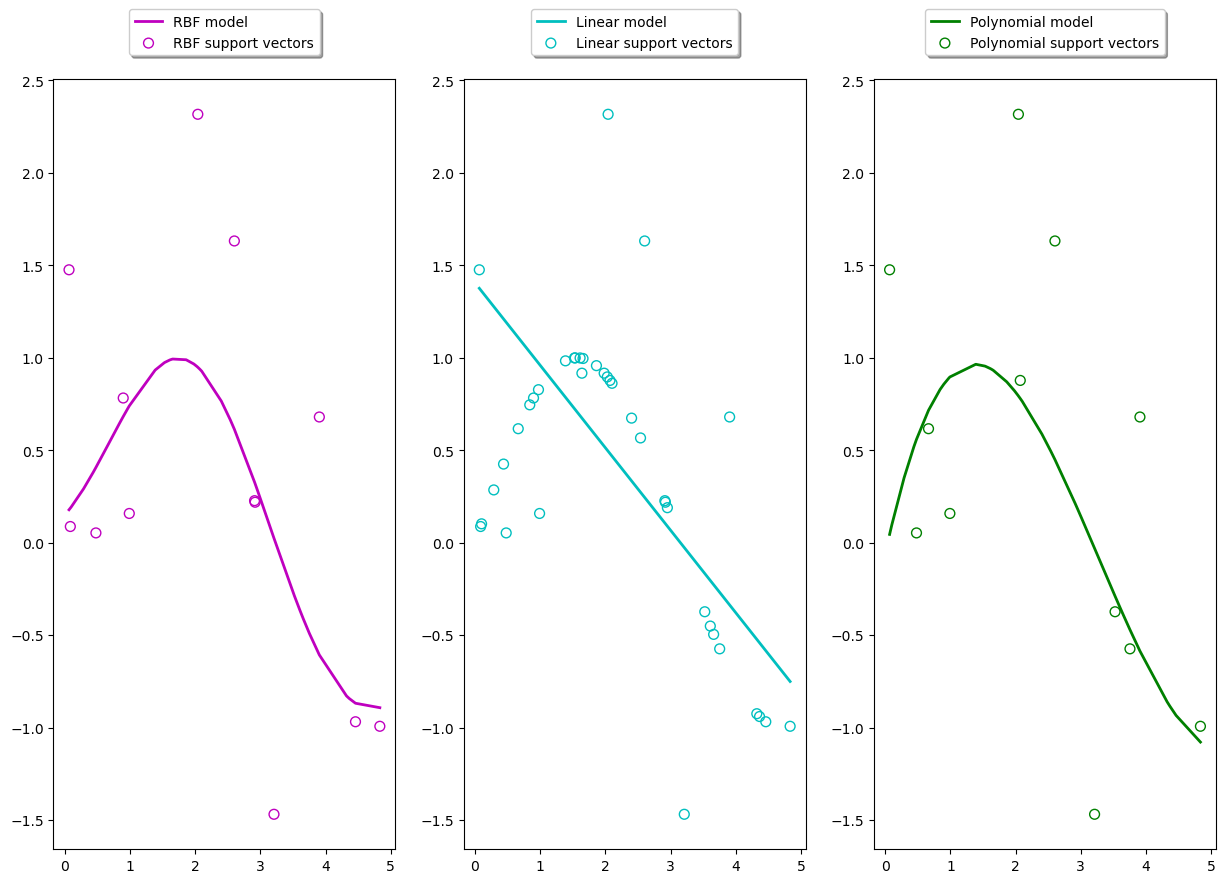

In [268]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,10))
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X,y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )